# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import random, time, io
from itertools import product
from utils import get_dataset_files, extract_first_entries, extract_random_entries, extract_best_entries, render_single, render_multiple, complexity_score
from IPython.display import display, Image as IPImage
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from ipyplot import plot_images
from PIL import Image as pilimg

# Load data, generate complexity score

In [2]:
names = ['snowman', 'pig', 'car', 'fish', 'power outlet']
files = list(map(lambda n: f'./dataset/{n}.ndjson', names))

df = extract_first_entries(files)
print(f'Loaded {len(df)} entries from {files}')

df['complexity'] = df.apply(lambda row: complexity_score(row['drawing']), axis=1)

df


Loaded 1013175 entries from ['./dataset/snowman.ndjson', './dataset/pig.ndjson', './dataset/car.ndjson', './dataset/fish.ndjson', './dataset/power outlet.ndjson']


,word,countrycode,timestamp,recognized,key_id,drawing,complexity
0,snowman,SG,2017-03-19 13:09:20.41026 UTC,True,5040959249186816,"[[[51, 37, 31, 33, 39, 56, 74, 88, 101, 106, 1...",39
1,snowman,GB,2017-04-01 00:23:56.92064 UTC,True,5057709479034880,"[[[128, 102, 73, 42, 36, 40, 55, 81, 112, 131,...",41
2,snowman,US,2017-01-28 22:52:14.74002 UTC,True,4649154502459392,"[[[95, 74, 56, 40, 36, 40, 53, 75, 89, 119, 13...",34
3,snowman,US,2017-03-02 19:02:04.75534 UTC,False,5668944822140928,"[[[17, 17], [36, 36]], [[14, 14, 26, 51, 58, 8...",55
4,snowman,US,2017-03-21 21:59:23.44407 UTC,True,5670608501211136,"[[[129, 116, 95, 79, 76, 79, 87, 111, 130, 139...",36
...,...,...,...,...,...,...,...
1013170,power outlet,DE,2017-03-01 18:59:51.55716 UTC,False,6095315251757056,"[[[39, 62, 141, 203, 230, 216, 206, 179, 143, ...",45
1013171,power outlet,US,2017-01-28 00:49:35.55104 UTC,True,5658681196675072,"[[[11, 11, 3, 0, 2, 17, 108, 133, 146, 152, 15...",39
1013172,power outlet,US,2017-03-29 16:36:04.20804 UTC,True,5824219382284288,"[[[57, 54, 51, 52, 61, 67, 64, 58, 58, 57], [9...",53
1013173,power outlet,DE,2017-03-26 19:43:38.12103 UTC,True,6522079023202304,"[[[212, 175, 167, 164, 159, 168, 198, 238, 250...",39


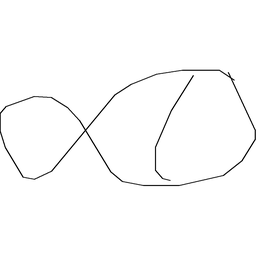

fish


In [20]:
img = df.sample().iloc[0]
display(IPImage(render_single(img['drawing'])))
print(img['word'])

In [21]:
print(df['word'].value_counts())

snowman         340029
pig             186770
car             182764
power outlet    169462
fish            134150
Name: word, dtype: int64


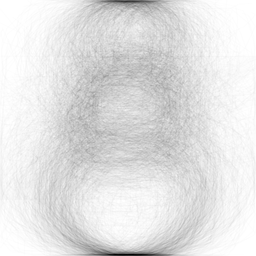

In [22]:
word = 'snowman'

imgs = df[df['word'] == 'snowman'].sample(1000)['drawing']
display(IPImage(render_multiple(imgs)))

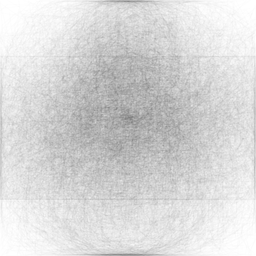

In [23]:
word = 'fish'

imgs = df[(df['word'] == 'snowman') & (df['recognized'] == False)].sample(1000)['drawing']
display(IPImage(render_multiple(imgs)))

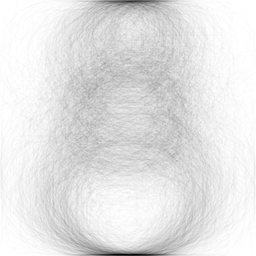

In [24]:
word = 'fish'

imgs = df[(df['word'] == 'snowman') & (df['recognized'] == True)].sample(1000)['drawing']
display(IPImage(render_multiple(imgs)))

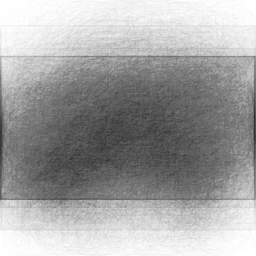

car


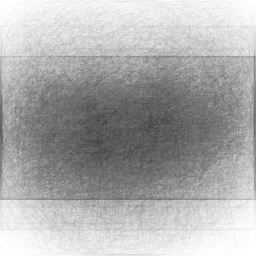

pig


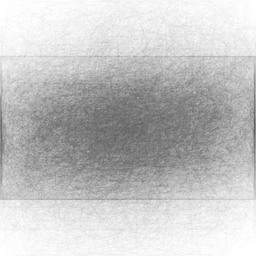

fish


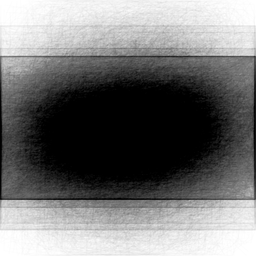

power outlet


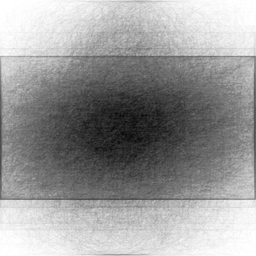

snowman


In [8]:
df2 = df.sort_values(by=['complexity'], ascending=False)

for word in set(df2['word'].values):
    imgs = df2[(df2['word'] == word) & (df2['recognized'] == False)][:1000]['drawing']
    display(IPImage(render_multiple(imgs)))
    print(word)

/home/chris/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: FutureWarning: The input object of type 'PngImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'PngImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return array(a, dtype, copy=False, order=order)



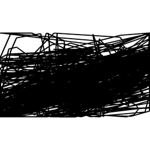
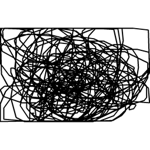
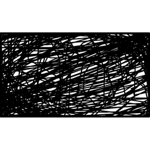
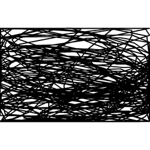
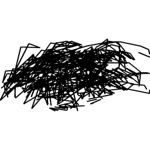
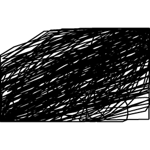
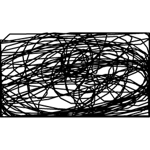
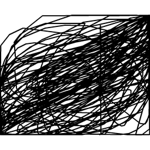
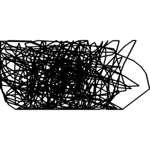
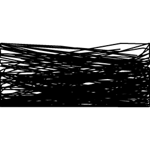
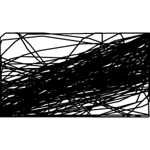
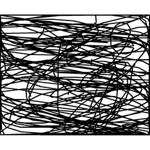
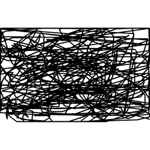
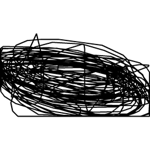
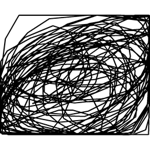
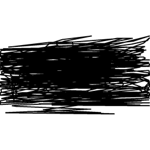
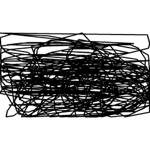
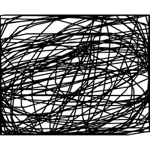
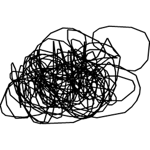
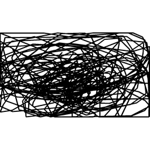
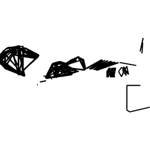
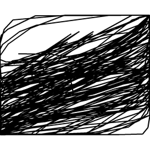
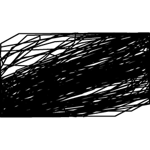
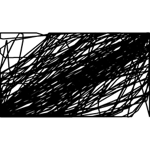
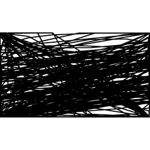
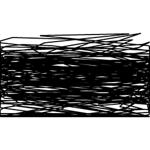
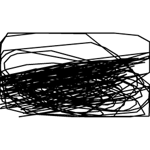
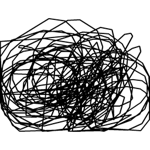
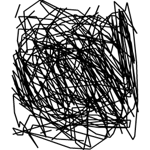
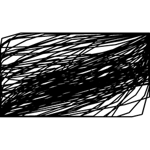


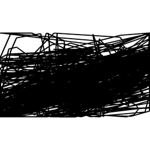
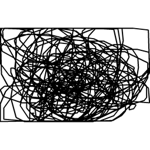
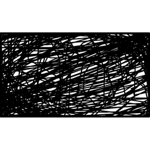
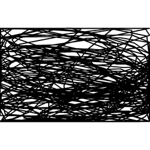
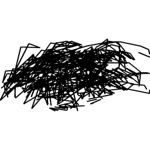
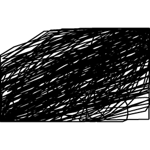
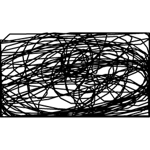
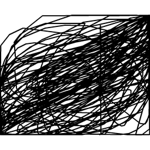
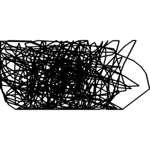
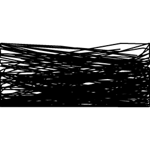
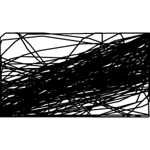
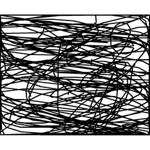
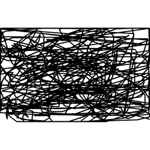
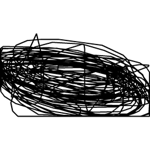
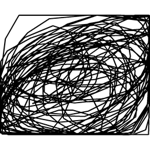
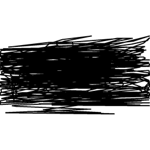
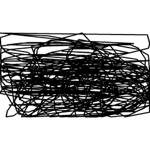
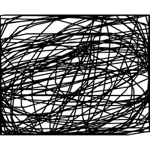
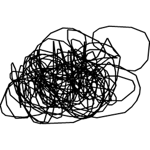
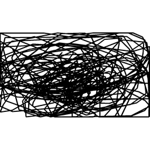
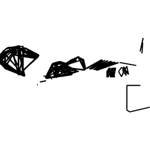
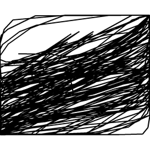
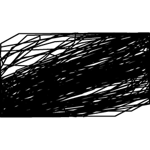
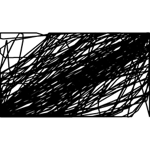
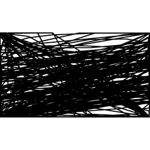
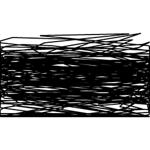
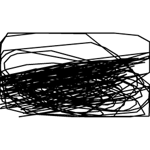
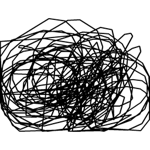
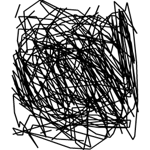
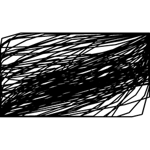

In [9]:
word = 'power outlet'
images = []
for i in range(300):
    images.append(pilimg.open(io.BytesIO(render_single(df2[df2['word'] == word]['drawing'].iloc[i], stroke_width_scale=2))))

plot_images(images)

count    1.013175e+06
mean     5.117391e+01
std      2.165045e+01
min      2.000000e+00
25%      3.800000e+01
50%      4.800000e+01
75%      5.900000e+01
max      1.230000e+03
Name: complexity, dtype: float64

array([[<AxesSubplot:title={'center':'complexity'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'complexity'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'complexity'}>]], dtype=object)

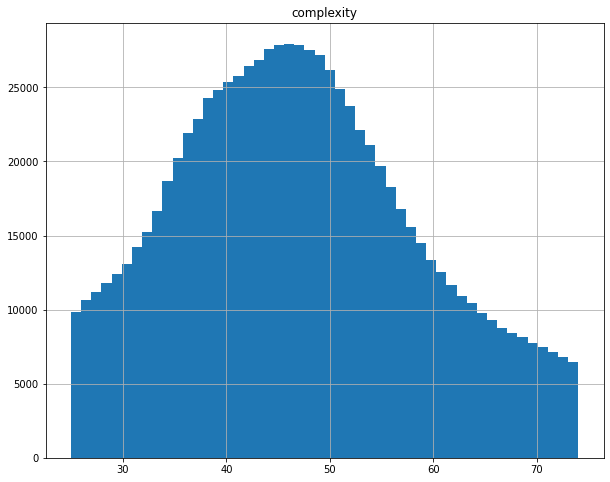

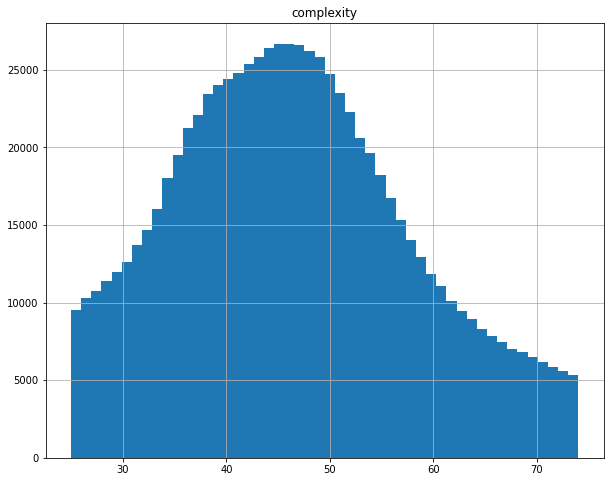

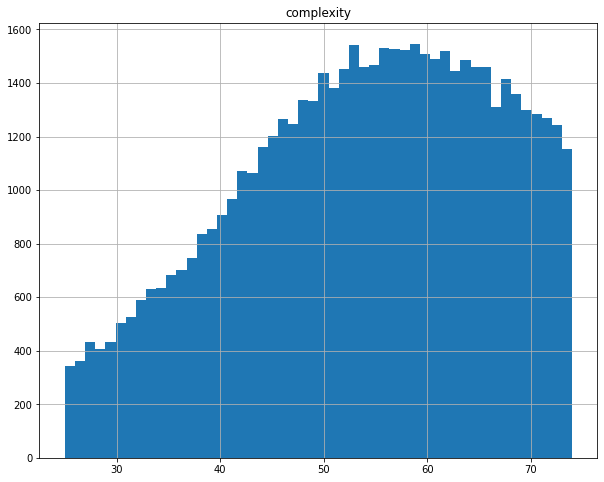

In [10]:
df2['complexity'].describe()
display(df2.hist(column='complexity', bins=50, range=[25, 74], figsize=(10, 8)))
display(df2[df2['recognized'] == True].hist(column='complexity', bins=50, range=[25, 74], figsize=(10, 8)))
display(df2[df2['recognized'] == False].hist(column='complexity', bins=50, range=[25, 74], figsize=(10, 8)))

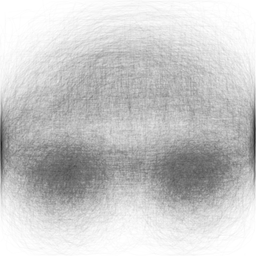

car, recognized


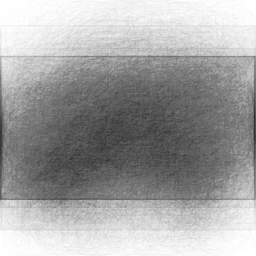

car, not recognized


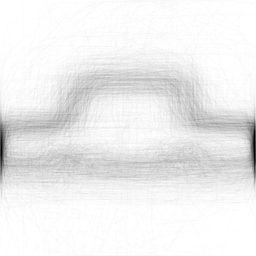

car, recognized


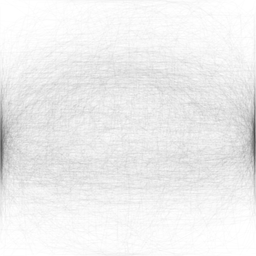

car, not recognized


In [11]:
word = random.choice(list(set(df2['word'].values)))
slices = [slice(None, 1000), slice(-1000, None)]
for n in product(slices, [True, False]):
    imgs = df2[(df2['word'] == word) & (df2['recognized'] == n[1])][n[0]]['drawing']
    display(IPImage(render_multiple(imgs)))
    print(word + (", recognized" if n[1] else ", not recognized"))